<a href="https://colab.research.google.com/github/NewtonSawitta/bsc_dpdm22/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepare Data

In [690]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [691]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [692]:
#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/gdrive')
     

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [693]:
import os
os.chdir('/content/gdrive/MyDrive/bsc_DPDM_data/Project')

In [694]:
data_test = pd.read_csv('/content/gdrive/MyDrive/bsc_DPDM_data/Project/Test.csv')
print(data_test.shape) # shown nomber of (row, column)
data_test.head(3)

(2627, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A


In [695]:
data_test.isnull().any()

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
Segmentation       False
dtype: bool

In [696]:
print(len(data_test[data_test['Graduated'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Graduated'])

24


In [697]:
print(len(data_test[data_test['Profession'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Profession'])

37


In [698]:
print(len(data_test[data_test['Ever_Married'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Ever_Married'])

47


In [699]:
print(len(data_test[data_test['Work_Experience'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Work_Experience'])

253


In [700]:
print(len(data_test[data_test['Family_Size'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Family_Size'])

88


In [701]:
#fill NA with Text 
data_test['Graduated'] = data_test['Graduated'].fillna('Unknown') #จบการศึกษาfillnaว่าunknown 
data_test['Profession'] = data_test['Profession'].fillna('Unknown') #อาชีพ

In [702]:
# fill NA with 0,1
data_test[['Work_Experience']]  = data_test[['Work_Experience']].fillna(0) #ประสบการณ์การทำงาน
data_test[['Family_Size']]  = data_test[['Family_Size']].fillna(1) #อย่างน้อยก็ต้องอยู่คนเดียว

In [703]:
del data_test['Var_1']

In [704]:
data_test.isnull().any()

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Segmentation       False
dtype: bool

In [705]:
data_train = pd.read_csv('/content/gdrive/MyDrive/bsc_DPDM_data/Project/Train.csv')
print(data_train.shape) # shown nomber of (row, column)
data_train.head(3)

(8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [706]:
data_train.isnull().any()

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
Segmentation       False
dtype: bool

In [707]:
print(len(data_train[data_train['Ever_Married'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Ever_Married'])

140


In [708]:
print(len(data_train[data_train['Graduated'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Graduated'])

74


In [709]:
print(len(data_train[data_train['Profession'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Profession'])

113


In [710]:
print(len(data_train[data_train['Work_Experience'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Work_Experience'])

772


In [711]:
print(len(data_train[data_train['Family_Size'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Family_Size'])

251


In [712]:
del data_train['Var_1']

In [713]:
#fill NA with Text 
data_train['Graduated'] = data_train['Graduated'].fillna('Unknown')  #จบการศึกษาfillnaว่าunknown 
data_train['Ever_Married'] = data_train['Ever_Married'].fillna('Unknown') #สถานภาพการสมรส
data_train['Profession'] = data_train['Profession'].fillna('Unknown') #อาชีพ
# fill NA with 0,1
data_train[['Work_Experience']]  = data_train[['Work_Experience']].fillna(0) #ประสบการณ์การทำงาน
data_train[['Family_Size']]  = data_train[['Family_Size']].fillna(1) #อย่างน้อยก็ต้องอยู่คนเดียว

In [714]:
data_train.isnull().any()

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Segmentation       False
dtype: bool

#Change string values into numerical values in Data_test

In [715]:
data_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,B
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,C
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,D


In [716]:
# ใช้ map() function
Gender_map = {'Male': 0, 'Female': 1}
data_test['Gender'] = data_test['Gender'].map(Gender_map)

# ใช้ replace() function
Marriage_map = {'No': 0, 'Yes': 1}
data_test['Ever_Married'] = data_test['Ever_Married'].replace(Marriage_map)

# ใช้ replace() function
Graduated_map = {'No': 0, 'Yes': 1}
data_test['Graduated'] = data_test['Graduated'].replace(Graduated_map)

# ใช้ map() function
Profession_map = {'Engineer': 0, 'Healthcare': 1, 'Executive': 2, 'Doctor': 3, 'Artist': 4, 'Healthcare': 5, 'Lawyer': 6, 'Entertainment': 7, 'Marketing': 8, 'Homemaker': 9}
data_test['Profession'] = data_test['Profession'].map(Profession_map)

# ใช้ map() function
Spending_Score_map = {'Low': 0, 'High': 1, 'Average': 2}
data_test['Spending_Score'] = data_test['Spending_Score'].map(Spending_Score_map)

# ใช้ map() function
Segmentation_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
data_test['Segmentation'] = data_test['Segmentation'].map(Segmentation_map)

In [717]:
data_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,458989,1,1,36,1,0,0.0,0,1.0,1
1,458994,0,1,37,1,5,8.0,2,4.0,0
3,459000,0,1,59,0,2,11.0,1,2.0,1
5,459003,0,1,47,1,3,0.0,1,5.0,2
6,459005,0,1,61,1,3,5.0,0,3.0,3


In [718]:
data_test.isnull().any()

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Segmentation       False
dtype: bool

#Change string values into numerical values in Data_train

In [719]:
data_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C


In [720]:
# ใช้ map() function
Gender_map = {'Male': 0, 'Female': 1}
data_train['Gender'] = data_train['Gender'].map(Gender_map)

# ใช้ replace() function
Marriage_map = {'No': 0, 'Yes': 1}
data_train['Ever_Married'] = data_train['Ever_Married'].replace(Marriage_map)

# ใช้ replace() function
Graduated_map = {'No': 0, 'Yes': 1}
data_train['Graduated'] = data_train['Graduated'].replace(Graduated_map)

# ใช้ map() function
Profession_map = {'Engineer': 0, 'Healthcare': 1, 'Executive': 2, 'Doctor': 3, 'Artist': 4, 'Healthcare': 5, 'Lawyer': 6, 'Entertainment': 7, 'Marketing': 8, 'Homemaker': 9}
data_train['Profession'] = data_train['Profession'].map(Profession_map)

# ใช้ map() function
Spending_Score_map = {'Low': 0, 'High': 1, 'Average': 2}
data_train['Spending_Score'] = data_train['Spending_Score'].map(Spending_Score_map)

# ใช้ map() function
Segmentation_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
data_train['Segmentation'] = data_train['Segmentation'].map(Segmentation_map)

In [721]:
data_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,0,0,22,0,5,1.0,0,4.0,3
2,466315,1,1,67,1,0,1.0,0,1.0,1
3,461735,0,1,67,1,6,0.0,1,2.0,1
5,461319,0,1,56,0,4,0.0,2,2.0,2
6,460156,0,0,32,1,5,1.0,0,3.0,2


In [722]:
data_train.isnull().any()

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Segmentation       False
dtype: bool

#Create Decision Tree

In [723]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [724]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# encode categorical variables
ohe = OneHotEncoder()
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
cat_array = ohe.fit_transform(data_test[cat_cols]).toarray()
cat_cols_encoded = ohe.get_feature_names_out(cat_cols)
cat_df = pd.DataFrame(cat_array, columns=cat_cols_encoded)

# handle missing values
imputer = SimpleImputer(strategy='median')
num_cols = ['Age', 'Work_Experience', 'Family_Size']
num_array = imputer.fit_transform(data_test[num_cols])
num_df = pd.DataFrame(num_array, columns=num_cols)

# concatenate encoded and imputed data
X = pd.concat([cat_df, num_df], axis=1)
y = data_test['Segmentation']

In [725]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Start - Train Decision Tree

##import

In [726]:
from sklearn.tree import DecisionTreeClassifier

##define

In [727]:
clf = DecisionTreeClassifier(random_state=6)

##train

In [728]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=6)

#predict - evaluate

Predict

In [729]:
y_predict = clf.predict(X_test)

Evaluate

In [730]:
from sklearn.metrics import classification_report

In [731]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.31      0.31      0.31       131
           1       0.19      0.18      0.19        98
           2       0.22      0.21      0.21        92
           3       0.24      0.26      0.25       115

    accuracy                           0.25       436
   macro avg       0.24      0.24      0.24       436
weighted avg       0.25      0.25      0.25       436



#Plot Decision Tree

In [732]:
from sklearn.tree import plot_tree

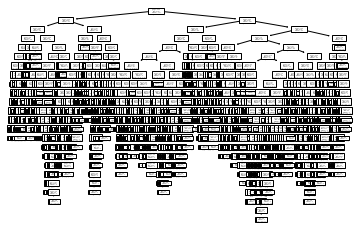

In [733]:
plot_tree(clf);

#ประเมิน Model

In [738]:
from sklearn.tree import DecisionTreeClassifier     
from sklearn.model_selection import GridSearchCV   #GridSearchCV คือ การหาค่าที่ดีที่สุดของพารามิเตอร์ วิธีคือการกำหนดค่าของแต่ละพารามิเตอร์ที่เราต้องการจะหา 

# Define the parameter sets to test   กำหนดชุดพารามิเตอร์ที่จะทดสอบ
param_grid = {'max_depth': [3, 5],
              'min_samples_split': [2, 5]}

# Define the model   กำหนดโมเดล
dt = DecisionTreeClassifier(random_state=42)

# Define the grid search  #กำหนดและหา  GridSearchCV 
dt_cv = GridSearchCV(dt, param_grid, cv=10)

# Fit the grid search to the data #ปรับ grid ให้ค้นหาข้อมูล
dt_cv.fit(X_train, y_train)

# Print the best parameters and the corresponding score แสดงพารามิเตอร์ที่ดีที่สุดและคะแนนที่เกี่ยวข้อง
print("Best parameters: ", dt_cv.best_params_)
print("Best score: ", dt_cv.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_split': 2}
Best score:  0.36451559934318556
